<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-0.210791,124.069474,123.950223,0.119251
1,0.0,1.0,81.927655,90.868231,1.179683,183.975569,183.042541,0.933028
2,0.0,2.0,32.641176,83.287889,0.450530,126.379595,126.106734,0.272860
3,0.0,3.0,21.725233,76.302108,-0.558781,107.468560,108.144871,-0.676311
4,0.0,4.0,76.574784,95.824456,1.738660,184.137900,182.687258,1.450642
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,0.504448,121.176639,120.858818,0.317821
59996,999.0,56.0,47.180985,50.913854,-0.576918,107.517922,108.037048,-0.519127
59997,999.0,57.0,60.209910,38.656766,-0.247540,108.619136,108.721827,-0.102691
59998,999.0,58.0,39.539485,87.817531,0.945844,138.302860,137.545822,0.757038


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-0.210791,124.069474,123.950223,0.119251
1,0.0,1.0,81.927655,90.868231,1.179683,183.975569,183.042541,0.933028
2,0.0,2.0,32.641176,83.287889,0.450530,126.379595,126.106734,0.272860
3,0.0,3.0,21.725233,76.302108,-0.558781,107.468560,108.144871,-0.676311
4,0.0,4.0,76.574784,95.824456,1.738660,184.137900,182.687258,1.450642
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,0.504448,121.176639,120.858818,0.317821
59996,999.0,56.0,47.180985,50.913854,-0.576918,107.517922,108.037048,-0.519127
59997,999.0,57.0,60.209910,38.656766,-0.247540,108.619136,108.721827,-0.102691
59998,999.0,58.0,39.539485,87.817531,0.945844,138.302860,137.545822,0.757038


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-0.210791,124.069474,123.950223,0.119251
1,0.0,1.0,81.927655,90.868231,1.179683,183.975569,183.042541,0.933028
2,0.0,2.0,32.641176,83.287889,0.450530,126.379595,126.106734,0.272860
3,0.0,3.0,21.725233,76.302108,-0.558781,107.468560,108.144871,-0.676311
4,0.0,4.0,76.574784,95.824456,1.738660,184.137900,182.687258,1.450642
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,0.504448,121.176639,120.858818,0.317821
59996,999.0,56.0,47.180985,50.913854,-0.576918,107.517922,108.037048,-0.519127
59997,999.0,57.0,60.209910,38.656766,-0.247540,108.619136,108.721827,-0.102691
59998,999.0,58.0,39.539485,87.817531,0.945844,138.302860,137.545822,0.757038


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

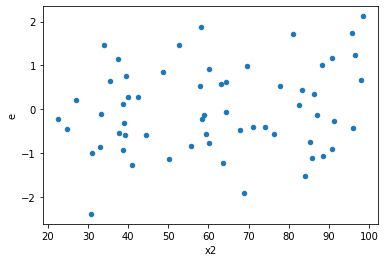

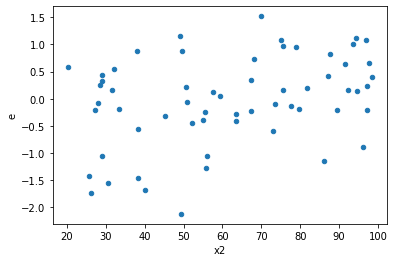

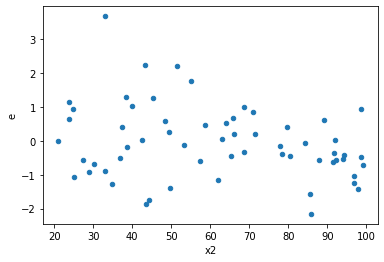

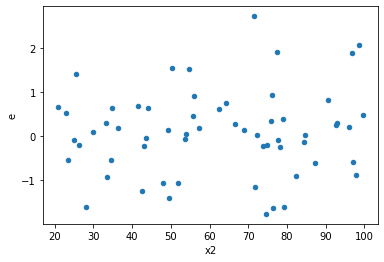

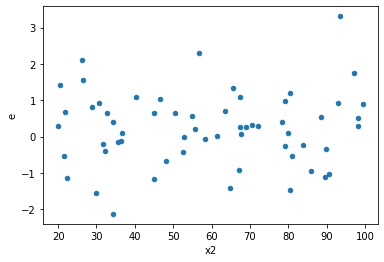

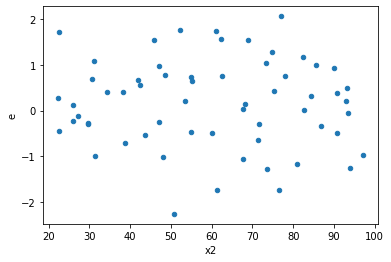

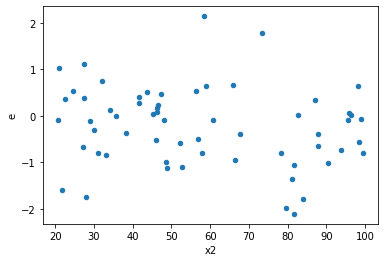

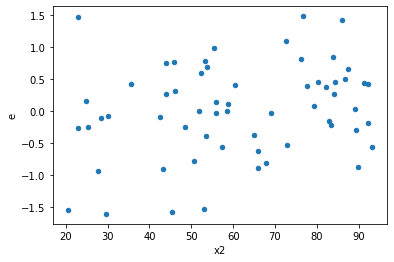

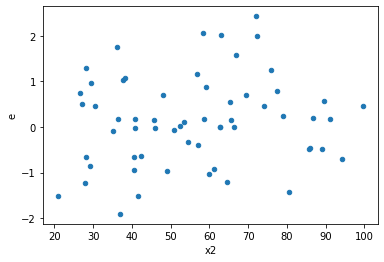

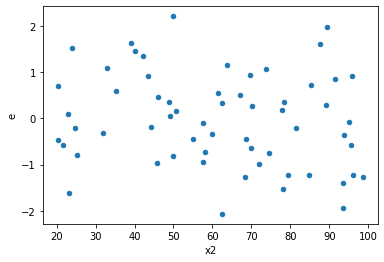

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,15.925250561930275,21.899999188513757,0.7238750255422852,0.9954545085688071,1.375174544560465,0.4610228903601741,0.769488554819913,0.23051144518008704,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,14.092131555893431,25.328733412065695,0.6405514343587924,1.1513060641848043,1.7973670847170764,0.17699193351058096,0.9115040332447095,0.08849596675529048,Reject001=1 : Homoscedasticity
12.0,22.0,22.0,18.61796979593219,39.04614817654596,0.8462713543605541,1.7748249171157255,2.0972291073904894,0.08942070020707105,0.9552896498964645,0.04471035010353552,Reject001=1 : Homoscedasticity
14.0,22.0,22.0,13.445667896869171,16.679764804196914,0.6111667225849623,0.7581711274634961,1.240530774085295,0.6175694559735718,0.6912152720132141,0.3087847279867859,Reject001=1 : Homoscedasticity
16.0,22.0,22.0,13.245471289255246,13.480989883267947,0.6020668767843294,0.6127722674212703,1.0177810656087227,0.9674021267316977,0.5162989366341512,0.48370106336584884,Reject001=1 : Homoscedasticity
18.0,22.0,22.0,15.016425192468866,22.115476473451814,0.6825647814758575,1.005248930611446,1.4727524154379505,0.3708378234688845,0.8145810882655578,0.18541891173444225,Reject001=1 : Homoscedasticity
20.0,22.0,22.0,12.530936607699426,18.317831341627812,0.5695880276227011,0.8326286973467187,1.4618086353076534,0.38007089908409997,0.80996455045795,0.19003544954204998,Reject001=1 : Homoscedasticity
23.0,22.0,22.0,12.507852750101033,23.239279134890257,0.5685387613682288,1.056330869767739,1.8579751136503058,0.15406948977363344,0.9229652551131833,0.07703474488681672,Reject001=1 : Homoscedasticity
24.0,22.0,22.0,17.225980439220994,22.650155563487605,0.7829991108736816,1.0295525256130729,1.3148833904348671,0.5262316269568823,0.7368841865215588,0.26311581347844115,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,15.925250561930275,21.899999188513757,0.7238750255422852,0.9954545085688071,1.375174544560465,0.4610228903601741,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,16.910142075433328,9.826009067580248,0.7686428216106058,0.44663677579910216,0.5810719403626567,0.2108353077310657,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,43.63956628195738,12.242847259967542,1.9836166491798808,0.5564930572712519,0.2805446594236502,0.0042751080530962545,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,14.092131555893431,25.328733412065695,0.6405514343587924,1.1513060641848043,1.7973670847170764,0.17699193351058096,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,21.853156260166053,17.765286791713226,0.9933252845530024,0.8075130359869648,0.8129391736467744,0.6313831173367002,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,25.458704956340572,21.188467063263193,1.1572138616518441,0.963112139239236,0.832268063108455,0.6705281620901918,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,18.22478688157342,15.566319692361919,0.8283994037078827,0.7075599860164509,0.8541290382989661,0.714803680650923,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,11.699445705833458,10.160913735420438,0.5317929866287936,0.46185971524638353,0.868495310880763,0.7438270977894474,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,25.288216727737844,22.868808694530703,1.1494643967153566,1.03949130429685,0.9043266648947463,0.8156585555102444,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      984
Reject001=0 : Heteroscedasticity     16
Name: Result_test, dtype: int64